In [1]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cleantxtdf=pd.read_csv('c:/Users/STLEE/FOMC/My Project/textdf/cleantextwithratesdf.csv')
cleantxtdf.drop('Unnamed: 0',axis=1,inplace=True)
cleantxtdf['date']=pd.to_datetime(cleantxtdf['date'],format='%Y-%m-%d', errors='coerce')

In [3]:
cleantxtdf

,date,Rate,Change,cleantext
0,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...
1,1999-06-30,5.000,0.25,The Federal Open Market Committee today voted ...
2,1999-08-24,5.250,0.25,The Federal Open Market Committee today voted ...
3,1999-10-05,5.250,0.00,The Federal Open Market Committee decided toda...
4,1999-11-16,5.500,0.25,The Federal Open Market Committee today voted ...
...,...,...,...,...
168,2019-09-18,1.875,-0.25,Information received since the Federal Open Ma...
169,2019-10-30,1.625,-0.25,Information received since the Federal Open Ma...
170,2019-12-11,1.625,0.00,Information received since the Federal Open Ma...
171,2020-01-29,1.625,0.00,Information received since the Federal Open Ma...


In [4]:
df_statementtiming = pd.read_csv('c:/Users/STLEE/FOMC/My Project/statement release timing/statementrelease.csv')
df_statementtiming['date']=pd.to_datetime(df_statementtiming['Date'],format='%d/%m/%Y', errors='coerce')
df_statementtiming.head(2)

,Date,Meeting,Time,date
0,18/5/1999,True,13:00:00,1999-05-18
1,30/6/1999,True,13:00:00,1999-06-30


In [5]:
cleantxtdf=pd.merge(cleantxtdf,df_statementtiming[['date','Time']],on='date',how='left')
#Combine Date and Time of Meeting
cleantxtdf['Datetime'] = pd.to_datetime(cleantxtdf['date'].apply(str)+' '+cleantxtdf['Time'])
#Keep relevant columns
#cleantxtdf=df_sentiment_timing[['Datetime','cleantext','IO Rates','Change_IO Rates','Policy','Rates','Inflation',
                                         #'Labor','Tone','Change_Policy','Change_Rates','Change_Inflation','Change_Labor',
                                         #'Change_Tone']]
cleantxtdf.drop(['Time','date'],axis=1,inplace=True)
cleantxtdf.head(2)

,Rate,Change,cleantext,Datetime
0,4.75,0.00,The Federal Reserve released the following sta...,1999-05-18 13:00:00
1,5.00,0.25,The Federal Open Market Committee today voted ...,1999-06-30 13:00:00


In [7]:
cleantxtdf

,Rate,Change,cleantext,Datetime
0,4.750,0.00,The Federal Reserve released the following sta...,1999-05-18 13:00:00
1,5.000,0.25,The Federal Open Market Committee today voted ...,1999-06-30 13:00:00
2,5.250,0.25,The Federal Open Market Committee today voted ...,1999-08-24 13:00:00
3,5.250,0.00,The Federal Open Market Committee decided toda...,1999-10-05 13:00:00
4,5.500,0.25,The Federal Open Market Committee today voted ...,1999-11-16 13:00:00
...,...,...,...,...
168,1.875,-0.25,Information received since the Federal Open Ma...,2019-09-18 13:00:00
169,1.625,-0.25,Information received since the Federal Open Ma...,2019-10-30 13:00:00
170,1.625,0.00,Information received since the Federal Open Ma...,2019-12-11 14:00:00
171,1.625,0.00,Information received since the Federal Open Ma...,2020-01-29 14:00:00


In [8]:
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [9]:
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)

In [11]:
temp=cleantxtdf['cleantext'].to_list()

In [12]:
cossim=['NA']
for x in range(len(temp)):
    if x==0:
        continue
    else:
        cossim.append(get_cosine_sim(temp[x-1],temp[x])[0][1])

In [13]:
cleantxtdf['cossimraw']=cossim

In [14]:
cleantxtdf[1:][cleantxtdf[1:]['cossimraw']<0.6]

,Rate,Change,cleantext,Datetime,cossimraw
80,1.5,-0.5,The Federal Reserve Board on Wednesday approve...,2008-10-08 06:00:00,0.517445


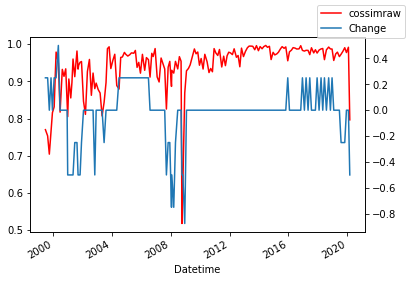

In [16]:
ax = cleantxtdf[1:].plot(x="Datetime", y="cossimraw", legend=False, color="r")
ax2 = ax.twinx()
cleantxtdf[1:].plot(x="Datetime", y="Change", ax=ax2, legend=False)
ax.figure.legend()
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import *
import nltk

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import *

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

vectorizer_s = StemmedTfidfVectorizer(stop_words='english',strip_accents='ascii')

In [19]:
vectorizer = StemmedTfidfVectorizer(min_df=1,stop_words='english',strip_accents='ascii')

In [20]:
X = vectorizer.fit_transform(cleantxtdf.cleantext.to_list())

In [21]:
pairwise_similarity = X * X.T 

In [22]:
cossimidfmatrix=pairwise_similarity.toarray() 

In [23]:
cossimidfmatrix

array([[1.        , 0.26169251, 0.3233543 , ..., 0.13315981, 0.13209665,
        0.05899578],
       [0.26169251, 1.        , 0.25441837, ..., 0.112068  , 0.1074702 ,
        0.05784765],
       [0.3233543 , 0.25441837, 1.        , ..., 0.20578554, 0.20039225,
        0.08583582],
       ...,
       [0.13315981, 0.112068  , 0.20578554, ..., 1.        , 0.92005941,
        0.32410198],
       [0.13209665, 0.1074702 , 0.20039225, ..., 0.92005941, 1.        ,
        0.42375155],
       [0.05899578, 0.05784765, 0.08583582, ..., 0.32410198, 0.42375155,
        1.        ]])

In [24]:
cossimidfmatrix[0][0+1]

0.26169250547279804

In [25]:
cossim_tfidf=['NA']
for i in range(cossimidfmatrix.shape[0]):
    if i==0:
        continue
    else:
        cossim_tfidf.append(cossimidfmatrix[i-1][i])

In [26]:
cleantxtdf['cossim_tfidf']=cossim_tfidf

In [27]:
cleantxtdf

,Rate,Change,cleantext,Datetime,cossimraw,cossim_tfidf
0,4.750,0.00,The Federal Reserve released the following sta...,1999-05-18 13:00:00,NA,NA
1,5.000,0.25,The Federal Open Market Committee today voted ...,1999-06-30 13:00:00,0.770075,0.261693
2,5.250,0.25,The Federal Open Market Committee today voted ...,1999-08-24 13:00:00,0.753304,0.254418
3,5.250,0.00,The Federal Open Market Committee decided toda...,1999-10-05 13:00:00,0.704167,0.202582
4,5.500,0.25,The Federal Open Market Committee today voted ...,1999-11-16 13:00:00,0.766121,0.277639
...,...,...,...,...,...,...
168,1.875,-0.25,Information received since the Federal Open Ma...,2019-09-18 13:00:00,0.981761,0.933967
169,1.625,-0.25,Information received since the Federal Open Ma...,2019-10-30 13:00:00,0.990738,0.957815
170,1.625,0.00,Information received since the Federal Open Ma...,2019-12-11 14:00:00,0.977702,0.927524
171,1.625,0.00,Information received since the Federal Open Ma...,2020-01-29 14:00:00,0.99196,0.920059


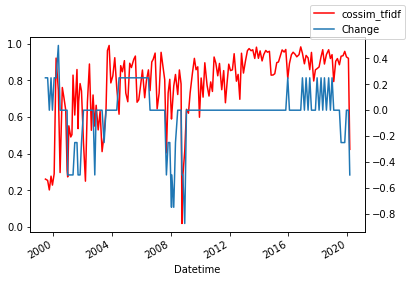

In [29]:
ax = cleantxtdf[1:].plot(x="Datetime", y="cossim_tfidf", legend=False, color="r")
ax2 = ax.twinx()
cleantxtdf[1:].plot(x="Datetime", y="Change", ax=ax2, legend=False)
ax.figure.legend()
plt.show()

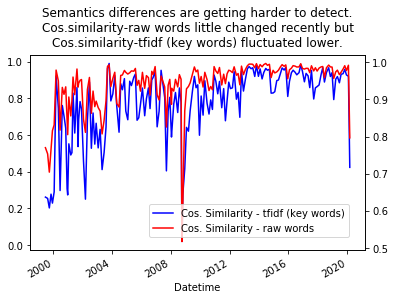

In [30]:
ax = cleantxtdf[1:].plot(x="Datetime", y="cossim_tfidf", legend=False, color="b",label="Cos. Similarity - tfidf (key words)")
ax2 = ax.twinx()
cleantxtdf[1:].plot(x="Datetime", y="cossimraw", ax=ax2, legend=False, color="r",label="Cos. Similarity - raw words")
plt.title(f'Semantics differences are getting harder to detect.\nCos.similarity-raw words little changed recently but\nCos.similarity-tfidf (key words) fluctuated lower.', 
          loc='center',fontsize=12,pad=8)
ax.figure.legend(bbox_to_anchor=(0.82, 0.35))
plt.show()

In [31]:
import matplotlib.ticker as mtick
ax = df_sentiment_timing[:].plot(x="Datetime", y="wordcount", legend=False, color="b",
                                 label='Word Count: Left Axis')

corrco=pearsonr(df_sentiment_timing["wordcount"],df_sentiment_timing["30mins_volatility_std"])
plt.title(f'EURUSD Return Volatility at every Statement Release\nvs. Word Count of each Statement', 
          loc='center',fontsize=12,pad=25)
plt.suptitle(f'\nCorrelation Coefficient: {round(corrco[0],2)} Significance: {round(corrco[1],2)}',
             fontsize=10,fontweight="bold")

ax2 = ax.twinx()
df_sentiment_timing[:].plot(x="Datetime", y="30mins_volatility_std", ax=ax2, color="darkred", legend=False, 
                            label="Return Volatility: Right Axis")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.figure.legend(bbox_to_anchor=(0.97, 0.138))
plt.show()

NameError: name 'df_sentiment_timing' is not defined

In [32]:
from gensim import corpora, models
from gensim.utils import simple_preprocess

In [33]:
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text))

In [34]:
worddict=set()
wordcountlist=[]
uniquewordcountlist=[]
for i in cleantxtdf.cleantext:
    uniquewordcount=0
    temp=[lemmatize_stemming(x) for x in simple_preprocess(i)]
    wordcountlist.append(len(temp))
    for k in temp:
        if k not in worddict:
            uniquewordcount+=1
    uniquewordcountlist.append(uniquewordcount)
    worddict.update(temp)

In [35]:
cleantxtdf['wordcount']=wordcountlist
cleantxtdf['uniquewordincrement']=uniquewordcountlist

In [36]:
cleantxtdf[cleantxtdf['wordcount']>300]

,Rate,Change,cleantext,Datetime,cossimraw,cossim_tfidf,wordcount,uniquewordincrement
54,3.750,0.250,The Federal Open Market Committee decided toda...,2005-09-20 13:00:00,0.937866,0.680502,337,19
82,0.125,-0.875,The Federal Open Market Committee decided toda...,2008-12-16 14:15:00,0.868901,0.415458,387,33
83,0.125,0.000,The Federal Open Market Committee decided toda...,2009-01-28 14:15:00,0.92849,0.641657,462,20
84,0.125,0.000,Information received since the Federal Open Ma...,2009-03-18 13:15:00,0.93492,0.620621,401,25
85,0.125,0.000,Information received since the Federal Open Ma...,2009-04-29 13:15:00,0.944468,0.731978,405,7
...,...,...,...,...,...,...,...,...
165,2.375,0.000,Information received since the Federal Open Ma...,2019-05-01 13:00:00,0.978823,0.918418,306,0
166,2.375,0.000,Information received since the Federal Open Ma...,2019-06-19 13:00:00,0.966806,0.884677,340,0
167,2.125,-0.250,Information received since the Federal Open Ma...,2019-07-31 13:00:00,0.973205,0.931214,386,1
168,1.875,-0.250,Information received since the Federal Open Ma...,2019-09-18 13:00:00,0.981761,0.933967,368,0


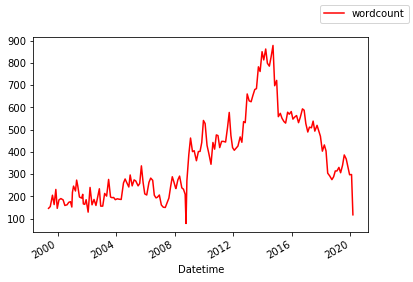

In [37]:
ax = cleantxtdf.plot(x="Datetime", y="wordcount", legend=False, color="r")
ax.figure.legend()
plt.show()

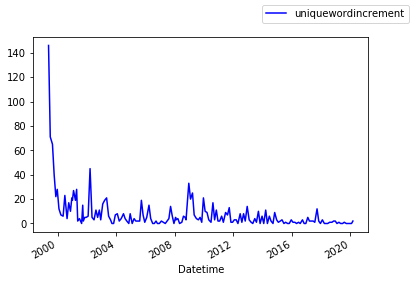

In [38]:
ax = cleantxtdf.plot(x="Datetime", y="uniquewordincrement", legend=False, color="b")
ax.figure.legend()
plt.show()

In [39]:
df_sentiment_timing=pd.read_csv('C:/Users/STLEE/FOMC/My Project/df_sentiment_timing.csv',index_col=0)
df_sentiment_timing['Datetime']=pd.to_datetime(df_sentiment_timing['Datetime'],format='%Y-%m-%d', errors='coerce')

In [40]:
df_sentiment_timing.head(2)

,Datetime,cleantext,IO Rates,Change_IO Rates,Policy,Rates,Inflation,Labor,Tone,Change_Policy,...,Change_Inflation,Change_Labor,Change_Tone,starttime,start_price,end(30mins)time,end_price,30mins_volatility,price_percent_change,30mins_volatility_std
0,2000-06-28 13:00:00,The Federal Open Market Committee at its meeti...,6.5,0.0,0.0,0.0,0.25,1.0,0.333333,-1.0,...,-0.75,1.0,-0.666667,2000-06-28 13:00:00,0.94372,2000-06-28 13:30:00,0.94340,6.913055e-08,-0.03,0.000263
1,2000-08-22 13:00:00,The Federal Open Market Committee at its meeti...,6.5,0.0,0.0,0.0,0.25,1.0,1.000000,0.0,...,0.00,0.0,0.666667,2000-08-22 13:00:00,0.89792,2000-08-22 13:30:00,0.89778,2.624454e-08,-0.02,0.000162


In [41]:
cleantxtdf.head(5)

,Rate,Change,cleantext,Datetime,cossimraw,cossim_tfidf,wordcount,uniquewordincrement
0,4.75,0.00,The Federal Reserve released the following sta...,1999-05-18 13:00:00,NA,NA,146,146
1,5.00,0.25,The Federal Open Market Committee today voted ...,1999-06-30 13:00:00,0.770075,0.261693,154,71
2,5.25,0.25,The Federal Open Market Committee today voted ...,1999-08-24 13:00:00,0.753304,0.254418,205,65
3,5.25,0.00,The Federal Open Market Committee decided toda...,1999-10-05 13:00:00,0.704167,0.202582,163,40
4,5.50,0.25,The Federal Open Market Committee today voted ...,1999-11-16 13:00:00,0.766121,0.277639,231,22


In [42]:
df_sentiment_timing=pd.merge(cleantxtdf,df_sentiment_timing,on='Datetime',how='left')

In [43]:
df_sentiment_timing=df_sentiment_timing[df_sentiment_timing['Datetime']>'2000-05-29'].copy()
df_sentiment_timing.reset_index(inplace=True,drop=True)

In [44]:
df_sentiment_timing[pd.isnull(df_sentiment_timing).any(axis=1)]

,Rate,Change,cleantext_x,Datetime,cossimraw,cossim_tfidf,wordcount,uniquewordincrement,cleantext_y,IO Rates,...,Change_Inflation,Change_Labor,Change_Tone,starttime,start_price,end(30mins)time,end_price,30mins_volatility,price_percent_change,30mins_volatility_std
28,1.0,0.0,The Federal Open Market Committee decided toda...,2003-08-12 13:00:00,0.896986,0.644013,197,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_sentiment_timing.dropna(subset=['30mins_volatility_std'],inplace=True)

In [47]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

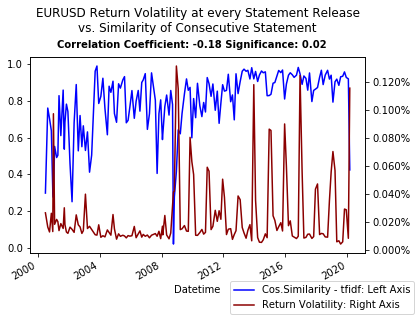

In [48]:
import matplotlib.ticker as mtick
ax = df_sentiment_timing[:].plot(x="Datetime", y="cossim_tfidf", legend=False, color="b",
                                 label='Cos.Similarity - tfidf: Left Axis')

corrco=pearsonr(df_sentiment_timing["cossim_tfidf"],df_sentiment_timing["30mins_volatility_std"])
plt.title(f'EURUSD Return Volatility at every Statement Release\nvs. Similarity of Consecutive Statement', 
          loc='center',fontsize=12,pad=25)
plt.suptitle(f'\nCorrelation Coefficient: {round(corrco[0],2)} Significance: {round(corrco[1],2)}',
             fontsize=10,fontweight="bold")

ax2 = ax.twinx()
df_sentiment_timing[:].plot(x="Datetime", y="30mins_volatility_std", ax=ax2, color="darkred", legend=False, 
                            label="Return Volatility: Right Axis")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.figure.legend(bbox_to_anchor=(0.97, 0.138))
plt.show()

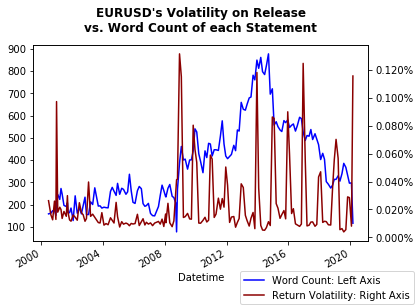

In [64]:
import matplotlib.ticker as mtick
ax = df_sentiment_timing[:].plot(x="Datetime", y="wordcount", legend=False, color="b",
                                 label='Word Count: Left Axis')

corrco=pearsonr(df_sentiment_timing["wordcount"],df_sentiment_timing["30mins_volatility_std"])
plt.title(f"EURUSD's Volatility on Release\nvs. Word Count of each Statement", 
          loc='center',fontsize=12,pad=13,fontweight="bold")

ax2 = ax.twinx()
df_sentiment_timing[:].plot(x="Datetime", y="30mins_volatility_std", ax=ax2, color="darkred", legend=False, 
                            label="Return Volatility: Right Axis")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.figure.legend(bbox_to_anchor=(0.97, 0.134))
plt.show()

In [ ]:
plt.axvline(x='2008-01-01',ls='--',label="Beginning of Higher Volatility")

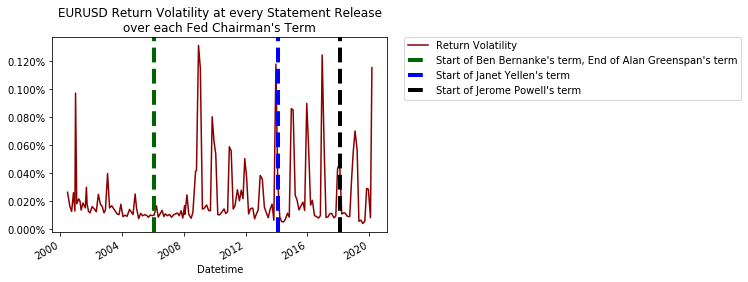

In [237]:
import matplotlib.ticker as mtick
ax = df_sentiment_timing[:].plot(x="Datetime", y="30mins_volatility_std", legend=False, color="darkred",
                                 label='Return Volatility')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title(f"EURUSD Return Volatility at every Statement Release\nover each Fed Chairman's Term", 
          loc='center',fontsize=12,pad=5)
plt.axvline(x='2006-02-01',ls='--',linewidth=4,label="Start of Ben Bernanke's term, End of Alan Greenspan's term",color='darkgreen')
plt.axvline(x='2014-02-03',ls='--',linewidth=4,label="Start of Janet Yellen's term",color='blue')
plt.axvline(x='2018-02-05',ls='--',linewidth=4,label="Start of Jerome Powell's term",color='black')
#ax.figure.legend(bbox_to_anchor=(0.9, 0.138))
#fig = plt.figure()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.add_axes([1, 1, 1, 1])

plt.show()